In [26]:
from sympy import *
import math

x, y = symbols('x y', real=True)
f = exp(1) + 20 - 20 * exp(-0.2*sqrt(0.5*(x*x + y*y))) - exp(0.5*(cos(2*pi*x) + cos(2*pi*y)))
diff(f, x)

2.82842712474619*x*exp(-0.14142135623731*sqrt(x**2 + y**2))/sqrt(x**2 + y**2) + 1.0*pi*exp(0.5*cos(2*pi*x) + 0.5*cos(2*pi*y))*sin(2*pi*x)

In [27]:
diff(f, y)

2.82842712474619*y*exp(-0.14142135623731*sqrt(x**2 + y**2))/sqrt(x**2 + y**2) + 1.0*pi*exp(0.5*cos(2*pi*x) + 0.5*cos(2*pi*y))*sin(2*pi*y)

In [24]:
from sympy import *
import math

x, y = symbols('x y', real=True)
f = (x*x + y - 11)**2 + (x + y*y - 7)**2
diff(f, x)

4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14

In [25]:
diff(f, y)

2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22

In [28]:
from sympy import *
import math

x, y = symbols('x y', real=True)
f = sin(0.5*x*x - 0.25*y*y + 3)*cos(2*x + 1 - exp(y))
diff(f, x)

1.0*x*cos(2*x - exp(y) + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) - 2*sin(2*x - exp(y) + 1)*sin(0.5*x**2 - 0.25*y**2 + 3)

In [29]:
diff(f, y)

-0.5*y*cos(2*x - exp(y) + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) + exp(y)*sin(2*x - exp(y) + 1)*sin(0.5*x**2 - 0.25*y**2 + 3)

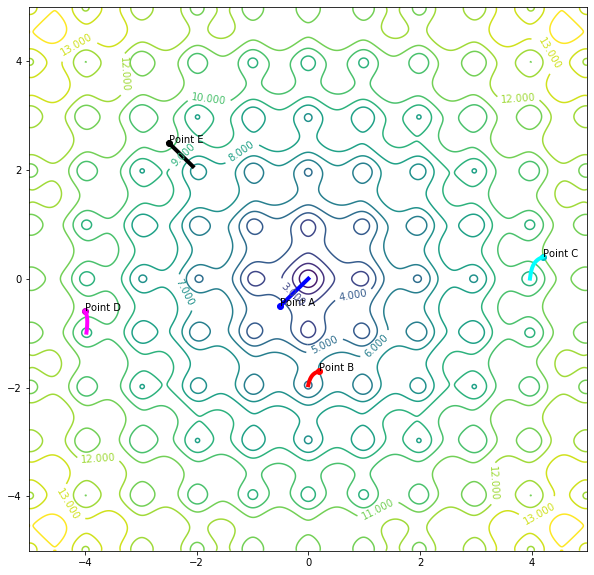

In [15]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

# https://stackoverflow.com/questions/20228546/how-do-i-apply-some-function-to-a-python-meshgrid
@np.vectorize
# https://github.com/adhishagc/Ackley-Function
def ackley_function(x,y):
  #returns the point value of the given coordinate
  part_1 = -0.2*math.sqrt(0.5*(x*x + y*y))
  part_2 = 0.5*(math.cos(2*math.pi*x) + math.cos(2*math.pi*y))
  value = math.exp(1) + 20 - 20 * math.exp(part_1) - math.exp(part_2)
  #returning the value
  return value

def derivative_x(x,y):
    part_1 = 2.82842712474619 * x * math.exp(-0.14142135623731 * math.sqrt(x*x + y*y))/(math.sqrt(x*x + y*y))
    part_2 = math.pi * math.exp(0.5*(math.cos(2*math.pi*x) + math.cos(2*math.pi*y))) * math.sin(2*math.pi*x)
    return part_1 + part_2

def derivative_y(x,y):
    part_1 = 2.82842712474619 * y * math.exp(-0.14142135623731 * math.sqrt(x*x + y*y))/(math.sqrt(x*x + y*y))
    part_2 = math.pi * math.exp(0.5*(math.cos(2*math.pi*x) + math.cos(2*math.pi*y))) * math.sin(2*math.pi*y)
    return part_1 + part_2

delta = 0.01
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)

# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
X, Y = np.meshgrid(x, y)
Z = ackley_function(X,Y)

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig, ax = plt.subplots(figsize=[10, 10])
levels = np.arange(0.0, 15.0, 1)
CS = plt.contour(X, Y, Z, levels=levels)
plt.clabel(CS, inline=1, fontsize=10)

A = [-0.5, -0.5]
B = [0.2, -1.7]
C = [4.2, 0.4]
D = [-4, -0.6]
E = [-2.5, 2.5]

ax.plot(A[0], A[1], 'bo')
ax.plot(B[0], B[1], 'ro')
ax.plot(C[0], C[1], 'co')
ax.plot(D[0], D[1], 'mo')
ax.plot(E[0], E[1], 'ko')

# https://www.kite.com/python/answers/how-to-label-a-single-point-in-a-matplotlib-graph-in-python
ax.annotate("Point A", (A[0], A[1]))
ax.annotate("Point B", (B[0], B[1]))
ax.annotate("Point C", (C[0], C[1]))
ax.annotate("Point D", (D[0], D[1]))
ax.annotate("Point E", (E[0], E[1]))

a_history = [[],[]]
b_history = [[],[]]
c_history = [[],[]]
d_history = [[],[]]
e_history = [[],[]]

# learning_rate = 0.005
# epochs = 100

learning_rate = 0.001
epochs = 150

for iter in range(epochs):
    #ax.plot(A[0], A[1], 'bo')
    #ax.plot(B[0], B[1], 'ro')
    #ax.plot(C[0], C[1], 'co')
    #ax.plot(D[0], D[1], 'mo')
    #ax.plot(E[0], E[1], 'ko')
    
    a_history[0].append(A[0]); a_history[1].append(A[1])
    b_history[0].append(B[0]); b_history[1].append(B[1])
    c_history[0].append(C[0]); c_history[1].append(C[1])
    d_history[0].append(D[0]); d_history[1].append(D[1])
    e_history[0].append(E[0]); e_history[1].append(E[1])
    
    A[0] = A[0] - learning_rate * derivative_x(A[0], A[1])
    A[1] = A[1] - learning_rate * derivative_y(A[0], A[1])
    
    B[0] = B[0] - learning_rate * derivative_x(B[0], B[1])
    B[1] = B[1] - learning_rate * derivative_y(B[0], B[1])
    
    C[0] = C[0] - learning_rate * derivative_x(C[0], C[1])
    C[1] = C[1] - learning_rate * derivative_y(C[0], C[1])
    
    D[0] = D[0] - learning_rate * derivative_x(D[0], D[1])
    D[1] = D[1] - learning_rate * derivative_y(D[0], D[1])
    
    E[0] = E[0] - learning_rate * derivative_x(E[0], E[1])
    E[1] = E[1] - learning_rate * derivative_y(E[0], E[1])


ax.plot(a_history[0], a_history[1], color='blue',    linewidth=4)
ax.plot(b_history[0], b_history[1], color='red',     linewidth=4)
ax.plot(c_history[0], c_history[1], color='cyan',    linewidth=4)
ax.plot(d_history[0], d_history[1], color='magenta', linewidth=4)
ax.plot(e_history[0], e_history[1], color='black',   linewidth=4)

plt.show()

**Nesterov accelerated gradient**

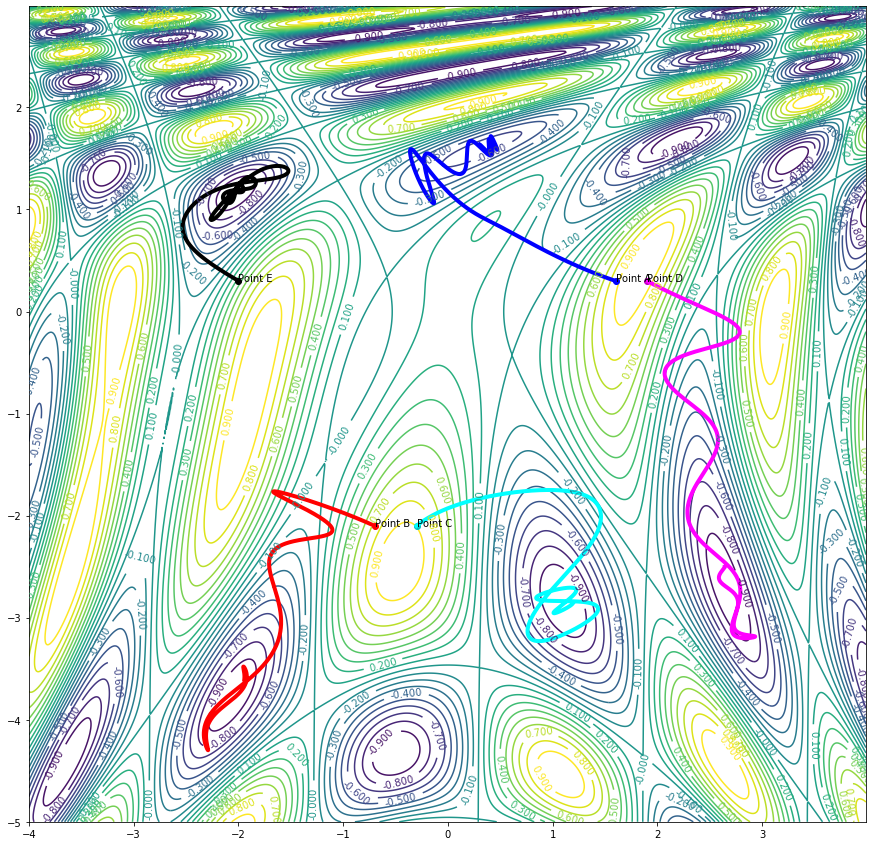

In [30]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

# https://stackoverflow.com/questions/20228546/how-do-i-apply-some-function-to-a-python-meshgrid
@np.vectorize
# https://en.wikipedia.org/wiki/Gradient_descent#Examples
def grad_descent_function(x,y):
    a = 0.5*x*x - 0.25*y*y + 3
    b = 2*x + 1 - math.exp(y)
    return math.sin(a)*math.cos(b)

def der_x(x,y):
    a = 0.5*x*x - 0.25*y*y + 3
    b = 2*x + 1 - math.exp(y)
    return x * math.cos(a) * math.cos(b) - 2 * math.sin(a) * math.sin(b)

def der_y(x,y):
    a = 0.5*x*x - 0.25*y*y + 3
    b = 2*x + 1 - math.exp(y)
    return -0.5 * y * math.cos(a) * math.cos(b) + math.exp(y) * math.sin(a) * math.sin(b)

delta = 0.01
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-5.0, 3.0, delta)

# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
X, Y = np.meshgrid(x, y)
Z = grad_descent_function(X,Y)

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig, ax = plt.subplots(figsize=[15, 15])
levels = np.arange(-1.0, 1.0, 0.1)
CS = ax.contour(X, Y, Z, levels=levels)
plt.clabel(CS, inline=1, fontsize=10)

A = [1.6,0.3]
B = [-0.7,-2.1]
C = [-0.3,-2.1]
D = [1.9,0.3]
E = [-2,0.3]

ax.plot(A[0], A[1], 'bo')
ax.plot(B[0], B[1], 'ro')
ax.plot(C[0], C[1], 'co')
ax.plot(D[0], D[1], 'mo')
ax.plot(E[0], E[1], 'ko')

# https://www.kite.com/python/answers/how-to-label-a-single-point-in-a-matplotlib-graph-in-python
ax.annotate("Point A", (A[0], A[1]))
ax.annotate("Point B", (B[0], B[1]))
ax.annotate("Point C", (C[0], C[1]))
ax.annotate("Point D", (D[0], D[1]))
ax.annotate("Point E", (E[0], E[1]))

a_history = [[],[]]
b_history = [[],[]]
c_history = [[],[]]
d_history = [[],[]]
e_history = [[],[]]

#learning_rate = 0.05
#epochs = 300

learning_rate = 0.005
epochs = 5000
gamma = 0.999

delta_A = [0,0]
delta_B = [0,0]
delta_C = [0,0]
delta_D = [0,0]
delta_E = [0,0]

for iter in range(epochs):
    #ax.plot(A[0], A[1], 'bo')
    #ax.plot(B[0], B[1], 'ro')
    #ax.plot(C[0], C[1], 'co')
    #ax.plot(D[0], D[1], 'mo')
    #ax.plot(E[0], E[1], 'ko')
    
    a_history[0].append(A[0]); a_history[1].append(A[1])
    b_history[0].append(B[0]); b_history[1].append(B[1])
    c_history[0].append(C[0]); c_history[1].append(C[1])
    d_history[0].append(D[0]); d_history[1].append(D[1])
    e_history[0].append(E[0]); e_history[1].append(E[1])
    
    delta_A[0] = gamma*delta_A[0] + (1 - gamma) * learning_rate * der_x(A[0], A[1])
    delta_A[1] = gamma*delta_A[1] + (1 - gamma) * learning_rate * der_y(A[0], A[1])
    
    A[0] = A[0] - delta_A[0]
    A[1] = A[1] - delta_A[1]
    
    delta_B[0] = gamma*delta_B[0] + (1 - gamma) * learning_rate * der_x(B[0], B[1])
    delta_B[1] = gamma*delta_B[1] + (1 - gamma) * learning_rate * der_y(B[0], B[1])
    
    B[0] = B[0] - delta_B[0]
    B[1] = B[1] - delta_B[1]
    
    delta_C[0] = gamma*delta_C[0] + (1 - gamma) * learning_rate * der_x(C[0], C[1])
    delta_C[1] = gamma*delta_C[1] + (1 - gamma) * learning_rate * der_y(C[0], C[1])
    
    C[0] = C[0] - delta_C[0]
    C[1] = C[1] - delta_C[1]
    
    delta_D[0] = gamma*delta_D[0] + (1 - gamma) * learning_rate * der_x(D[0], D[1])
    delta_D[1] = gamma*delta_D[1] + (1 - gamma) * learning_rate * der_y(D[0], D[1])
    
    D[0] = D[0] - delta_D[0]
    D[1] = D[1] - delta_D[1]
    
    delta_E[0] = gamma*delta_E[0] + (1 - gamma) * learning_rate * der_x(E[0], E[1])
    delta_E[1] = gamma*delta_E[1] + (1 - gamma) * learning_rate * der_y(E[0], E[1])
    
    E[0] = E[0] - delta_E[0]
    E[1] = E[1] - delta_E[1]

ax.plot(a_history[0], a_history[1], color='blue',    linewidth=4)
ax.plot(b_history[0], b_history[1], color='red',     linewidth=4)
ax.plot(c_history[0], c_history[1], color='cyan',    linewidth=4)
ax.plot(d_history[0], d_history[1], color='magenta', linewidth=4)
ax.plot(e_history[0], e_history[1], color='black',   linewidth=4)
    
plt.show()

**AdaGrad**

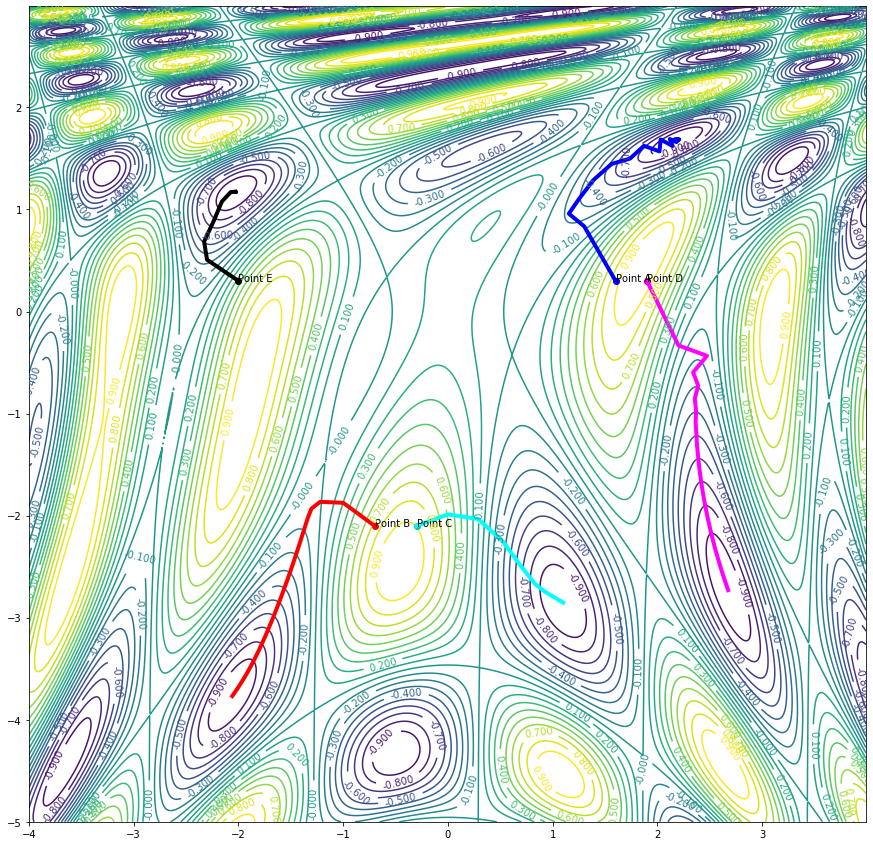

In [52]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

# https://stackoverflow.com/questions/20228546/how-do-i-apply-some-function-to-a-python-meshgrid
@np.vectorize
# https://en.wikipedia.org/wiki/Gradient_descent#Examples
def grad_descent_function(x,y):
    a = 0.5*x*x - 0.25*y*y + 3
    b = 2*x + 1 - math.exp(y)
    return math.sin(a)*math.cos(b)

def der_x(x,y):
    a = 0.5*x*x - 0.25*y*y + 3
    b = 2*x + 1 - math.exp(y)
    return x * math.cos(a) * math.cos(b) - 2 * math.sin(a) * math.sin(b)

def der_y(x,y):
    a = 0.5*x*x - 0.25*y*y + 3
    b = 2*x + 1 - math.exp(y)
    return -0.5 * y * math.cos(a) * math.cos(b) + math.exp(y) * math.sin(a) * math.sin(b)

delta = 0.01
x = np.arange(-4.0, 4.0, delta)
y = np.arange(-5.0, 3.0, delta)

# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
X, Y = np.meshgrid(x, y)
Z = grad_descent_function(X,Y)

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig, ax = plt.subplots(figsize=[15, 15])
levels = np.arange(-1.0, 1.0, 0.1)
CS = ax.contour(X, Y, Z, levels=levels)
plt.clabel(CS, inline=1, fontsize=10)

A = [1.6,0.3]
B = [-0.7,-2.1]
C = [-0.3,-2.1]
D = [1.9,0.3]
E = [-2,0.3]



ax.plot(A[0], A[1], 'bo')
ax.plot(B[0], B[1], 'ro')
ax.plot(C[0], C[1], 'co')
ax.plot(D[0], D[1], 'mo')
ax.plot(E[0], E[1], 'ko')

# https://www.kite.com/python/answers/how-to-label-a-single-point-in-a-matplotlib-graph-in-python
ax.annotate("Point A", (A[0], A[1]))
ax.annotate("Point B", (B[0], B[1]))
ax.annotate("Point C", (C[0], C[1]))
ax.annotate("Point D", (D[0], D[1]))
ax.annotate("Point E", (E[0], E[1]))

a_history = [[],[]]
b_history = [[],[]]
c_history = [[],[]]
d_history = [[],[]]
e_history = [[],[]]

#learning_rate = 0.05
#epochs = 300

learning_rate = 0.3
epochs = 300

diag_G_A = [0,0]
diag_G_B = [0,0]
diag_G_C = [0,0]
diag_G_D = [0,0]
diag_G_E = [0,0]

for iter in range(epochs):
    #ax.plot(A[0], A[1], 'bo')
    #ax.plot(B[0], B[1], 'ro')
    #ax.plot(C[0], C[1], 'co')
    #ax.plot(D[0], D[1], 'mo')
    #ax.plot(E[0], E[1], 'ko')
    
    a_history[0].append(A[0]); a_history[1].append(A[1])
    b_history[0].append(B[0]); b_history[1].append(B[1])
    c_history[0].append(C[0]); c_history[1].append(C[1])
    d_history[0].append(D[0]); d_history[1].append(D[1])
    e_history[0].append(E[0]); e_history[1].append(E[1])
    
    diag_G_A[0] = diag_G_A[0] + (der_x(A[0], A[1]))**2
    diag_G_A[1] = diag_G_A[1] + (der_y(A[0], A[1]))**2
    
    A[0] = A[0] - learning_rate * (1/math.sqrt(diag_G_A[0])) * der_x(A[0], A[1])
    A[1] = A[1] - learning_rate * (1/math.sqrt(diag_G_A[1])) * der_y(A[0], A[1])
    
    diag_G_B[0] = diag_G_B[0] + (der_x(B[0], B[1]))**2
    diag_G_B[1] = diag_G_B[1] + (der_y(B[0], B[1]))**2
    
    B[0] = B[0] - learning_rate * (1/math.sqrt(diag_G_B[0])) * der_x(B[0], B[1])
    B[1] = B[1] - learning_rate * (1/math.sqrt(diag_G_B[1])) * der_y(B[0], B[1])

    diag_G_C[0] = diag_G_C[0] + (der_x(C[0], C[1]))**2
    diag_G_C[1] = diag_G_C[1] + (der_y(C[0], C[1]))**2
    
    C[0] = C[0] - learning_rate * (1/math.sqrt(diag_G_C[0])) * der_x(C[0], C[1])
    C[1] = C[1] - learning_rate * (1/math.sqrt(diag_G_C[1])) * der_y(C[0], C[1])
    
    diag_G_D[0] = diag_G_D[0] + (der_x(D[0], D[1]))**2
    diag_G_D[1] = diag_G_D[1] + (der_y(D[0], D[1]))**2
    
    D[0] = D[0] - learning_rate * (1/math.sqrt(diag_G_D[0])) * der_x(D[0], D[1])
    D[1] = D[1] - learning_rate * (1/math.sqrt(diag_G_D[1])) * der_y(D[0], D[1])
    
    diag_G_E[0] = diag_G_E[0] + (der_x(E[0], E[1]))**2
    diag_G_E[1] = diag_G_E[1] + (der_y(E[0], E[1]))**2
    
    E[0] = E[0] - learning_rate * (1/math.sqrt(diag_G_E[0])) * der_x(E[0], E[1])
    E[1] = E[1] - learning_rate * (1/math.sqrt(diag_G_E[1])) * der_y(E[0], E[1])
    
ax.plot(a_history[0], a_history[1], color='blue',    linewidth=4)
ax.plot(b_history[0], b_history[1], color='red',     linewidth=4)
ax.plot(c_history[0], c_history[1], color='cyan',    linewidth=4)
ax.plot(d_history[0], d_history[1], color='magenta', linewidth=4)
ax.plot(e_history[0], e_history[1], color='black',   linewidth=4)
    
plt.show()

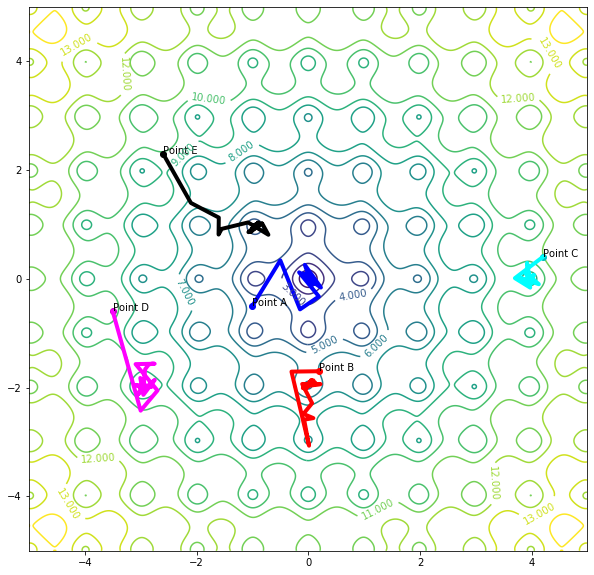

In [55]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

# https://stackoverflow.com/questions/20228546/how-do-i-apply-some-function-to-a-python-meshgrid
@np.vectorize
# https://github.com/adhishagc/Ackley-Function
def ackley_function(x,y):
  #returns the point value of the given coordinate
  part_1 = -0.2*math.sqrt(0.5*(x*x + y*y))
  part_2 = 0.5*(math.cos(2*math.pi*x) + math.cos(2*math.pi*y))
  value = math.exp(1) + 20 - 20 * math.exp(part_1) - math.exp(part_2)
  #returning the value
  return value

def derivative_x(x,y):
    part_1 = 2.82842712474619 * x * math.exp(-0.14142135623731 * math.sqrt(x*x + y*y))/(math.sqrt(x*x + y*y))
    part_2 = math.pi * math.exp(0.5*(math.cos(2*math.pi*x) + math.cos(2*math.pi*y))) * math.sin(2*math.pi*x)
    return part_1 + part_2

def derivative_y(x,y):
    part_1 = 2.82842712474619 * y * math.exp(-0.14142135623731 * math.sqrt(x*x + y*y))/(math.sqrt(x*x + y*y))
    part_2 = math.pi * math.exp(0.5*(math.cos(2*math.pi*x) + math.cos(2*math.pi*y))) * math.sin(2*math.pi*y)
    return part_1 + part_2

delta = 0.01
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
X, Y = np.meshgrid(x, y)
Z = ackley_function(X,Y)

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig, ax = plt.subplots(figsize=[10, 10])
levels = np.arange(0.0, 15.0, 1)
CS = plt.contour(X, Y, Z, levels=levels)
plt.clabel(CS, inline=1, fontsize=10)

A = [-1, -0.5]
B = [0.2, -1.7]
C = [4.2, 0.4]
D = [-3.5, -0.6]
E = [-2.6, 2.3]

ax.plot(A[0], A[1], 'bo')
ax.plot(B[0], B[1], 'ro')
ax.plot(C[0], C[1], 'co')
ax.plot(D[0], D[1], 'mo')
ax.plot(E[0], E[1], 'ko')

# https://www.kite.com/python/answers/how-to-label-a-single-point-in-a-matplotlib-graph-in-python
ax.annotate("Point A", (A[0], A[1]))
ax.annotate("Point B", (B[0], B[1]))
ax.annotate("Point C", (C[0], C[1]))
ax.annotate("Point D", (D[0], D[1]))
ax.annotate("Point E", (E[0], E[1]))

a_history = [[],[]]
b_history = [[],[]]
c_history = [[],[]]
d_history = [[],[]]
e_history = [[],[]]

#learning_rate = 0.05
#epochs = 300

learning_rate = 0.5
epochs = 300

diag_G_A = [0,0]
diag_G_B = [0,0]
diag_G_C = [0,0]
diag_G_D = [0,0]
diag_G_E = [0,0]

for iter in range(epochs):
    #ax.plot(A[0], A[1], 'bo')
    #ax.plot(B[0], B[1], 'ro')
    #ax.plot(C[0], C[1], 'co')
    #ax.plot(D[0], D[1], 'mo')
    #ax.plot(E[0], E[1], 'ko')
    
    a_history[0].append(A[0]); a_history[1].append(A[1])
    b_history[0].append(B[0]); b_history[1].append(B[1])
    c_history[0].append(C[0]); c_history[1].append(C[1])
    d_history[0].append(D[0]); d_history[1].append(D[1])
    e_history[0].append(E[0]); e_history[1].append(E[1])
    
    diag_G_A[0] = diag_G_A[0] + (derivative_x(A[0], A[1]))**2
    diag_G_A[1] = diag_G_A[1] + (derivative_y(A[0], A[1]))**2
    
    A[0] = A[0] - learning_rate * (1/math.sqrt(diag_G_A[0])) * derivative_x(A[0], A[1])
    A[1] = A[1] - learning_rate * (1/math.sqrt(diag_G_A[1])) * derivative_y(A[0], A[1])
    
    diag_G_B[0] = diag_G_B[0] + (derivative_x(B[0], B[1]))**2
    diag_G_B[1] = diag_G_B[1] + (derivative_y(B[0], B[1]))**2
    
    B[0] = B[0] - learning_rate * (1/math.sqrt(diag_G_B[0])) * derivative_x(B[0], B[1])
    B[1] = B[1] - learning_rate * (1/math.sqrt(diag_G_B[1])) * derivative_y(B[0], B[1])

    diag_G_C[0] = diag_G_C[0] + (derivative_x(C[0], C[1]))**2
    diag_G_C[1] = diag_G_C[1] + (derivative_y(C[0], C[1]))**2
    
    C[0] = C[0] - learning_rate * (1/math.sqrt(diag_G_C[0])) * derivative_x(C[0], C[1])
    C[1] = C[1] - learning_rate * (1/math.sqrt(diag_G_C[1])) * derivative_y(C[0], C[1])
    
    diag_G_D[0] = diag_G_D[0] + (derivative_x(D[0], D[1]))**2
    diag_G_D[1] = diag_G_D[1] + (derivative_y(D[0], D[1]))**2
    
    D[0] = D[0] - learning_rate * (1/math.sqrt(diag_G_D[0])) * derivative_x(D[0], D[1])
    D[1] = D[1] - learning_rate * (1/math.sqrt(diag_G_D[1])) * derivative_y(D[0], D[1])
    
    diag_G_E[0] = diag_G_E[0] + (derivative_x(E[0], E[1]))**2
    diag_G_E[1] = diag_G_E[1] + (derivative_y(E[0], E[1]))**2
    
    E[0] = E[0] - learning_rate * (1/math.sqrt(diag_G_E[0])) * derivative_x(E[0], E[1])
    E[1] = E[1] - learning_rate * (1/math.sqrt(diag_G_E[1])) * derivative_y(E[0], E[1])
    
ax.plot(a_history[0], a_history[1], color='blue',    linewidth=4)
ax.plot(b_history[0], b_history[1], color='red',     linewidth=4)
ax.plot(c_history[0], c_history[1], color='cyan',    linewidth=4)
ax.plot(d_history[0], d_history[1], color='magenta', linewidth=4)
ax.plot(e_history[0], e_history[1], color='black',   linewidth=4)
    
plt.show()